## Introdução ao Projeto de Análise de Dados do Campeonato Brasileiro (2003-2022)


Neste projeto, teremos a oportunidade de mergulhar nos dados detalhados das partidas do Campeonato Brasileiro no período entre 2003 e 2022. Ao explorar esses dados, nosso objetivo é obter insights que nos ajudem a compreender melhor esse torneio tão prestigiado e querido pelos brasileiros. 

O principal objetivo deste estudo é utilizar quatro datasets disponíveis no Kaggle (https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol) para aprofundar nossa compreensão do Campeonato Brasileiro ao longo desses anos.

As quatro fontes de dados utilizadas neste projeto incluem:

campeonato-brasileiro-full.csv: Contém informações fundamentais sobre cada partida, como ID, rodada, data, horário, dia da semana, clubes mandante e visitante, formação de ambos os times, técnicos, vencedor (ou empate) da partida, arena em que ocorreu o jogo e os placares finais.

campeonato-brasileiro-estatisticas-full.csv: Oferece estatísticas detalhadas dos clubes em cada partida, incluindo chutes, chutes a gol, posse de bola, quantidade e precisão de passes, faltas cometidas, cartões amarelos e vermelhos recebidos, impedimentos e escanteios.

campeonato-brasileiro-gols.csv: Fornece informações específicas sobre cada gol marcado em todas as edições do campeonato, incluindo o atleta responsável, o minuto em que o gol foi feito e o clube ao qual o atleta pertence.

campeonato-brasileiro-cartoes.csv: Detalha os cartões aplicados em cada partida, indicando o clube, o tipo de cartão (amarelo ou vermelho), o atleta punido, o número de camisa do atleta, sua posição na partida e o minuto em que o cartão foi concedido.

Com base nesses datasets, responderemos 8 perguntas, que abrangem desde o desempenho dos clubes ao longo do tempo até as estatísticas individuais dos jogadores nas partidas.

## Importação dos Pacotes

In [1]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

# Desativar os avisos do pandas temporariamente
warnings.filterwarnings('ignore')

## Carregando os Dados

In [2]:
# Carregamento
df_full = pd.read_csv('dados/campeonato-brasileiro-full.csv')
df_est_full = pd.read_csv('dados/campeonato-brasileiro-estatisticas-full.csv')
df_gols = pd.read_csv('dados/campeonato-brasileiro-gols.csv')
df_cartoes = pd.read_csv('dados/campeonato-brasileiro-cartoes.csv')

In [3]:
print(f"campeonato-brasileiro-full.csv tem {df_full.shape[0]} linhas e {df_full.shape[1]} colunas.")
print(f"campeonato-brasileiro-estatisticas-full.csv tem {df_est_full.shape[0]} linhas e {df_est_full.shape[1]} colunas.")
print(f"campeonato-brasileiro-gols.csv tem {df_gols.shape[0]} linhas e {df_gols.shape[1]} colunas.")
print(f"campeonato-brasileiro-cartoes.csv tem {df_cartoes.shape[0]} linhas e {df_cartoes.shape[1]} colunas.")

campeonato-brasileiro-full.csv tem 8025 linhas e 16 colunas.
campeonato-brasileiro-estatisticas-full.csv tem 16050 linhas e 13 colunas.
campeonato-brasileiro-gols.csv tem 7986 linhas e 6 colunas.
campeonato-brasileiro-cartoes.csv tem 16739 linhas e 8 colunas.


In [4]:
df_full.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [5]:
df_est_full.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


In [6]:
df_gols.head()

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Fred,45,Penalty
1,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
2,4607,1,Fluminense,Rafael Sóbis,31,NaN
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4611,1,Sao Paulo,Antônio Carlos dos Santos Aguiar,13,NaN


In [7]:
df_cartoes.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
2,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
3,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10
4,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44


## Pré-Processamento dos Dados

In [8]:
# Padronização do nomes das colunas
df_full.rename(columns={'ID': 'partida_id'}, inplace=True)

In [9]:
# Correção de texto
df_full.rename(columns={'rodata': 'rodada'}, inplace=True)
df_est_full.rename(columns={'rodata': 'rodada'}, inplace=True)
df_gols.rename(columns={'rodata': 'rodada'}, inplace=True)
df_cartoes.rename(columns={'rodata': 'rodada'}, inplace=True)

## Análise Exploratória

### Verificando se há registro duplicados.

In [10]:
df_full[df_full.duplicated()]

,partida_id,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado


In [11]:
df_est_full[df_est_full.duplicated()]

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios


In [12]:
df_gols[df_gols.duplicated()]

,partida_id,rodada,clube,atleta,minuto,tipo_de_gol


In [13]:
df_cartoes[df_cartoes.duplicated()]

,partida_id,rodada,clube,cartao,atleta,num_camisa,posicao,minuto


### Verificando se há valores nulos.

In [14]:
df_full.isnull().sum()

partida_id               0
rodada                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [15]:
df_est_full.isnull().sum()

partida_id            0
rodada                0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola      9212
passes                0
precisao_passes    9212
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
dtype: int64

In [16]:
df_gols.isnull().sum()

partida_id        0
rodada            0
clube             0
atleta            0
minuto            0
tipo_de_gol    7015
dtype: int64

In [17]:
df_cartoes.isnull().sum()

partida_id       0
rodada           0
clube            0
cartao           0
atleta           6
num_camisa     386
posicao       1198
minuto           0
dtype: int64

É possível notar a presença de diversos valores ausentes nos dados. No entanto, o aspecto mais preocupante é a constatação de que no dataset "df_est_full", muitos valores faltantes não são representados como "NaN", mas sim como "0". Por exemplo, existem partidas em que a coluna "passes" está registrada como "0", o que é altamente improvável de ocorrer, indicando que, em algumas colunas desse dataset, foram inseridos valores "0" em vez de "NaN" para representar a ausência de dados.

In [18]:
df_est_full[df_est_full.passes == 0]

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13697,6849,35,Gremio,0,0,None,0,None,0,0,0,0,0
13766,6884,38,Avai,0,0,None,0,None,0,0,0,0,0
13767,6884,38,Athletico-PR,0,0,None,0,None,0,0,0,0,0
14018,7015,13,Atletico-MG,0,0,None,0,None,0,0,0,0,0


Todas essas linhas praticamente não contém informações alguma e serão retiradas.

In [19]:
# Excluindo linha com valores ausentes
df_est_full = df_est_full[df_est_full.passes != 0]
df_est_full.head(10)

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
9458,4741,13,Chapecoense,15,0,35%,280,None,19,4,0,0,8
9459,4741,13,Flamengo,9,0,65%,509,None,13,1,0,1,5
9594,4808,20,Palmeiras,10,0,44%,384,None,18,4,0,1,5
9595,4808,20,Criciuma,10,0,56%,471,None,17,3,0,1,6
9644,4833,22,Coritiba,9,0,43%,360,None,14,5,0,1,11
9645,4833,22,Sao Paulo,5,0,57%,481,None,10,1,0,3,2
9670,4846,23,Gremio,15,0,42%,357,None,20,2,0,1,9
9671,4846,23,Chapecoense,14,0,58%,477,None,14,4,0,2,4
9684,4853,24,Fluminense,16,0,48%,363,None,17,0,0,1,6
9685,4853,24,Gremio,15,0,52%,383,None,19,0,0,4,6


Ainda podemos notar valores ausentes em "chutes_no_alvo" e "precisao_passes"

### Aplicando conversões e ajustes.

In [20]:
df_full.dtypes

partida_id             int64
rodada                 int64
data                  object
hora                  object
mandante              object
visitante             object
formacao_mandante     object
formacao_visitante    object
tecnico_mandante      object
tecnico_visitante     object
vencedor              object
arena                 object
mandante_Placar        int64
visitante_Placar       int64
mandante_Estado       object
visitante_Estado      object
dtype: object

In [21]:
# Convertendo a coluna de datas para o tipo datetime
df_full['data'] = pd.to_datetime(df_full['data'], format='%d/%m/%Y')
# Padronizando coluna vencedor
df_full['vencedor'].replace('-', 'Empate', inplace=True)

In [22]:
df_est_full.dtypes

partida_id          int64
rodada              int64
clube              object
chutes              int64
chutes_no_alvo      int64
posse_de_bola      object
passes              int64
precisao_passes    object
faltas              int64
cartao_amarelo      int64
cartao_vermelho     int64
impedimentos        int64
escanteios          int64
dtype: object

In [23]:
# Convertendo a coluna de posse_de_bola para o tipo inteiro
df_est_full['posse_de_bola'] = df_est_full['posse_de_bola'].str[:2].astype(int)

In [24]:
# Convertendo a coluna de precisao_passes para o tipo inteiro e preenchendo valores NaN pela media

# Substituindo valores 'None' para '000'
df_est_full['precisao_passes'].replace('None','000', inplace=True)

# Convertendo a coluna para o tipo de dado inteiro
df_est_full['precisao_passes'] = df_est_full['precisao_passes'].str[:2].astype(int)

# Preenchendo os valores NaN com a média dos outros valores
df_est_full['precisao_passes'].replace(0, pd.NA, inplace=True)
df_est_full['precisao_passes'].fillna(df_est_full['precisao_passes'].mean(), inplace=True)

# Convertendo novamente para o tipo de dado inteiro
df_est_full['precisao_passes'] = df_est_full['precisao_passes'].astype(int)

In [25]:
df_gols.dtypes

partida_id      int64
rodada          int64
clube          object
atleta         object
minuto         object
tipo_de_gol    object
dtype: object

Há referências de tempo como '45+2', que indicam a prorrogação. Para converter os minutos para valores inteiros, vou adicionar uma nova coluna chamada 'tempo', que mostrará o momento do jogo em que o gol foi feito. Dessa forma, '45+2' será transformado em 47, com a coluna 'tempo' marcada como 1, para indicar que o gol foi feito na prorrogação e não aos 47 minutos do segundo tempo.

In [26]:
# Função para verificar o tempo (primeiro ou segundo)
def verificar_tempo(minuto):
    if '+' in minuto:
        partes = minuto.split('+')
        if int(partes[0]) <= 45:
            return 1 # Primeiro tempo
        else:
            return 2 # Segundo tempo
    else:
        if int(minuto) <= 45:
            return 1 # Primeiro tempo
        else:
            return 2 # Segundo tempo
    
# Função para converter o formato de tempo com prorrogação (por exemplo, '45+2' para 47)
def converter_tempo(minuto):
    if '+' in minuto:
        partes = minuto.split('+')
        return int(partes[0]) + int(partes[1])
    else:
        return int(minuto)

In [27]:
# Aplicando as conversões
df_gols['tempo'] = df_gols['minuto'].apply(verificar_tempo)
df_gols['minuto'] = df_gols['minuto'].apply(converter_tempo)

In [28]:
df_cartoes.dtypes

partida_id      int64
rodada          int64
clube          object
cartao         object
atleta         object
num_camisa    float64
posicao        object
minuto         object
dtype: object

In [29]:
# Aplicando as conversões
df_cartoes['tempo'] = df_cartoes['minuto'].apply(verificar_tempo)
df_cartoes['minuto'] = df_cartoes['minuto'].apply(converter_tempo)

### Observando as datas dos datasets 

In [30]:
df_est_full['partida_id'].min()

4698

In [31]:
df_full[df_full.partida_id > 4698].head(3)

,partida_id,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
4696,4707,10,2014-07-16,19:29,Gremio,Goias,NaN,NaN,E. Alves Moreira,S. Drubscky de Campos,Empate,Arena do Grêmio,0,0,RS,GO
4697,4708,10,2014-07-16,19:34,Coritiba,Figueirense,NaN,NaN,C. Juarez Roth,A. Ferreira,Figueirense,Couto Pereira,0,2,PR,SC
4698,4709,10,2014-07-16,19:31,Sport,Botafogo-RJ,NaN,NaN,E. Baptista,V. Carmo Mancini,Sport,Adelmar da Costa Carvalho,1,0,PE,RJ


Dataset "campeonato-brasileiro-estatisticas-full" a partir da rodada 10 do ano de 2014.

In [32]:
df_gols['partida_id'].min()

4607

In [33]:
df_cartoes['partida_id'].min()

4607

In [34]:
df_full[df_full.partida_id > 4607].head(3)

,partida_id,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
4607,4608,1,2014-04-19,18:31,Internacional,Vitoria,NaN,NaN,A. da Silva Braga,N. da Silveira Júnior,Internacional,Estádio José Pinheiro Borda,1,0,RS,BA
4608,4609,1,2014-04-19,20:59,Chapecoense,Coritiba,NaN,NaN,G. Dal Pozzo,C. Juarez Roth,Empate,Arena Condá,0,0,SC,PR
4609,4610,1,2014-04-20,16:00,Athletico-PR,Gremio,NaN,NaN,M. Portugal Vicario,E. Alves Moreira,Athletico-PR,Orlando Scarpelli,1,0,PR,RS


Dataset "campeonato-brasileiro-gols" e "campeonato-brasileiro-cartoes" a partir da rodada 1 do ano de 2014.

# Perguntas

### 1 - Os 10 times com mais vitórias, empates, derrotas no campeonato brasileiro desde 2003?

In [35]:
# Calculando os times com mais vitórias
vitorias_por_time = df_full['vencedor'].value_counts()

# Calculando os times com mais empates
# Somar o número de empates dentro e fora de casa de um time e ordenar descrescente
empates_por_time = pd.concat([df_full['mandante'][df_full['vencedor'] == 'Empate'].value_counts(),
                             df_full['visitante'][df_full['vencedor'] == 'Empate'].value_counts()],
                            axis=1).sum(axis=1).sort_values(ascending=False)

# Calculando os times com mais derrotas
# Somar o número de derrotas dentro e fora de casa de um time e ordenar descrescente
# Se o time for mandante e o vencedor for o visitante o time mandante perdeu.
derrotas_por_time = pd.concat([df_full['mandante'][df_full['vencedor'] == df_full['visitante']].value_counts(),
                              df_full['visitante'][df_full['vencedor'] == df_full['mandante']].value_counts()],
                             axis=1).sum(axis=1).sort_values(ascending=False)



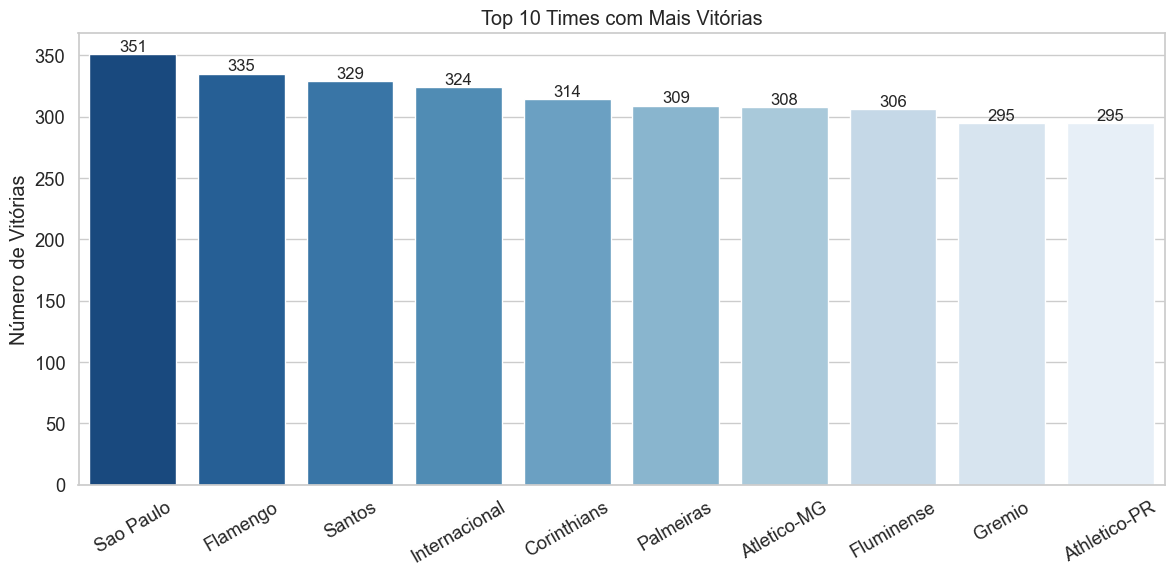

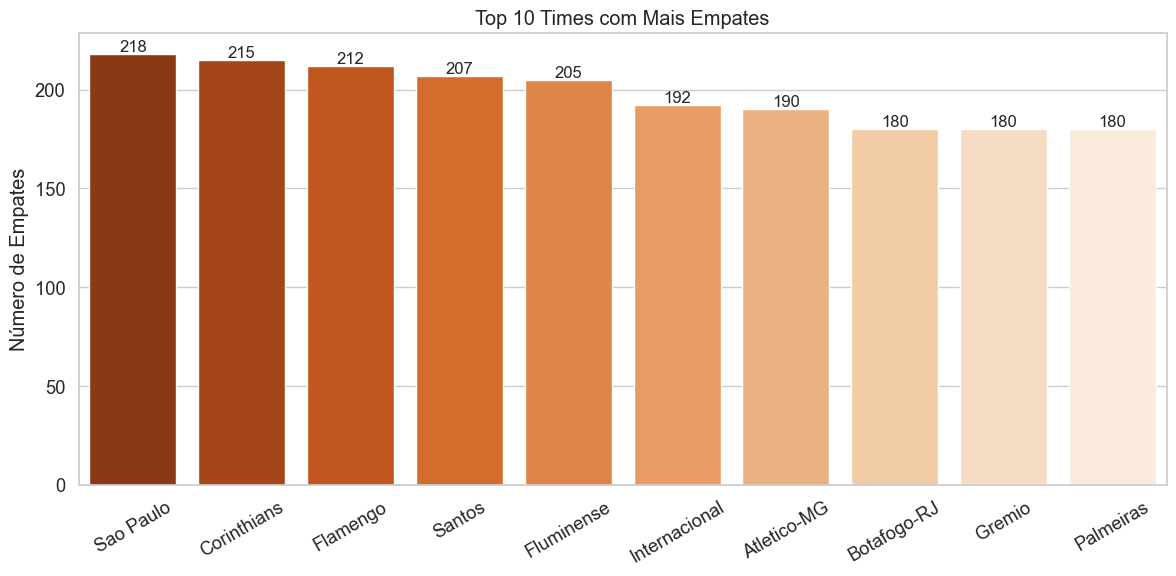

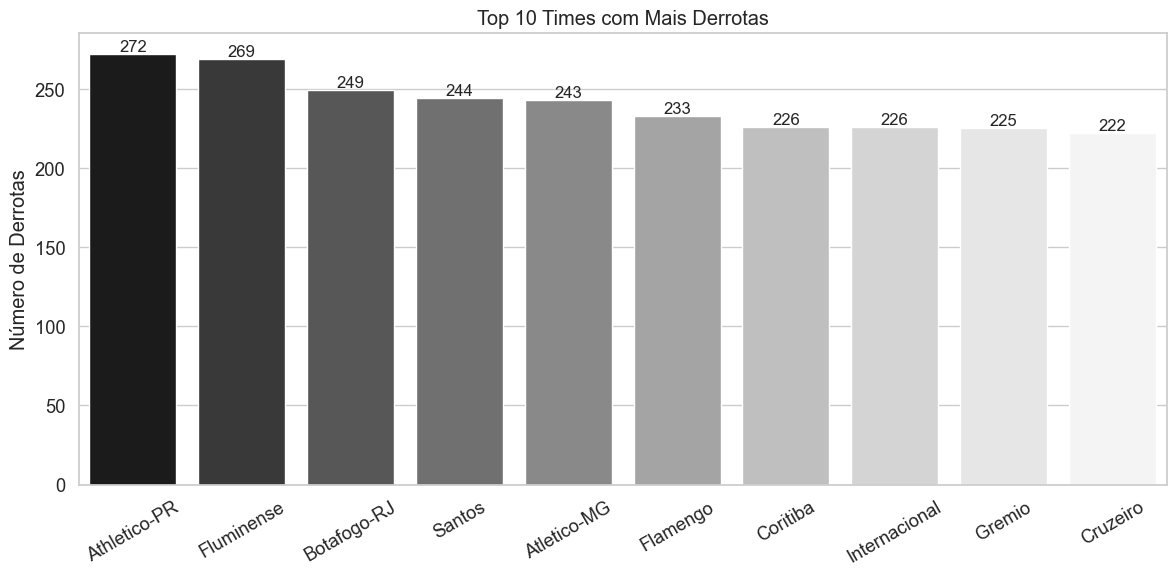

In [36]:
# Configurações de estilo para melhorar a estética dos gráficos
sns.set(style="whitegrid", font_scale=1.2)

# Gráfico dos 10 times com mais vitórias
top_10_vitorias = vitorias_por_time[1:11]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_vitorias.index, y=top_10_vitorias.values, palette="Blues_r")
plt.ylabel('Número de Vitórias')
plt.title('Top 10 Times com Mais Vitórias')
plt.xticks(rotation=30)

# Adicionando a legenda com o número de Y em cada barra
for index, value in enumerate(top_10_vitorias.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Ajustando a figura
plt.tight_layout()
plt.show()

# Gráfico dos 10 times com mais empates
top_10_empates = empates_por_time[0:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_empates.index, y=top_10_empates.values, palette="Oranges_r")
plt.ylabel('Número de Empates')
plt.title('Top 10 Times com Mais Empates')
plt.xticks(rotation=30)

# Adicionando a legenda com o número de Y em cada barra
for index, value in enumerate(top_10_empates.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Ajustando a figura
plt.tight_layout()
plt.show()

# Gráfico dos 10 times com mais derrotas
top_10_derrotas = derrotas_por_time[0:10]
plt.figure(figsize=(12, 6))
ax3 = sns.barplot(x=top_10_derrotas.index, y=top_10_derrotas.values, palette="Greys_r")
plt.ylabel('Número de Derrotas')
plt.title('Top 10 Times com Mais Derrotas')
plt.xticks(rotation=30)

# Adicionando a legenda com o número de Y em cada barra
for index, value in enumerate(top_10_derrotas.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Ajustando a figura
plt.tight_layout()
plt.show()

### 2 - Quais foram os 20 melhores times desde 2003?

In [37]:
# Criando a tabela
df_tabela = pd.DataFrame(columns=['Time', 'Partidas Jogadas', 'Vitórias', 'Empates', 'Derrotas', 'Pontos', 'Aproveitamento'])

In [38]:
# Calculando o número de pontos para cada time (soma das vitórias e empates)
pontos_por_time = ((vitorias_por_time * 3) + empates_por_time).sort_values(ascending=False)

In [39]:
# Preechendo a tabela
df_tabela['Time'] = pontos_por_time.index[:20]
df_tabela['Pontos'] = pontos_por_time.values[:20].astype(int)
df_tabela['Vitórias'] = df_tabela['Time'].map(vitorias_por_time)
df_tabela['Empates'] = df_tabela['Time'].map(empates_por_time)
df_tabela['Derrotas'] = df_tabela['Time'].map(derrotas_por_time)
df_tabela['Partidas Jogadas'] = df_tabela['Vitórias'] + df_tabela['Empates'] + df_tabela['Derrotas']

# Calculando o aproveitamento
df_tabela['Aproveitamento'] = ((df_tabela['Vitórias'] * 3 + df_tabela['Empates']) / 
                               ((df_tabela['Vitórias'] + df_tabela['Empates'] + df_tabela['Derrotas']) * 3)) * 100

# Arredondando o valor para duas casas decimais e adicionando o símbolo de porcentagem (%)
df_tabela['Aproveitamento'] = df_tabela['Aproveitamento'].round(2).astype(str) + '%'

In [40]:
# Ajustando o index da tabela
df_tabela.index = range(1, len(df_tabela) + 1)
df_tabela

,Time,Partidas Jogadas,Vitórias,Empates,Derrotas,Pontos,Aproveitamento
1,Sao Paulo,780,351,218,211,1271,54.32%
2,Flamengo,780,335,212,233,1217,52.01%
3,Santos,780,329,207,244,1194,51.03%
4,Internacional,742,324,192,226,1164,52.29%
5,Corinthians,742,314,215,213,1157,51.98%
6,Fluminense,780,306,205,269,1123,47.99%
7,Atletico-MG,741,308,190,243,1114,50.11%
8,Palmeiras,696,309,180,207,1107,53.02%
9,Gremio,700,295,180,225,1065,50.71%
10,Athletico-PR,742,295,175,272,1060,47.62%


### 3 -  Quais são os 10 melhores mandantes e os 10 melhres visitantes desde 2003?

In [41]:
# Calculando os 10 melhores mandantes
mandantes = ((((df_full['mandante'][df_full['vencedor'] == df_full['mandante']].value_counts() * 3) 
               + df_full['mandante'][df_full['vencedor'] == 'Empate'].value_counts()) 
              / (df_full['mandante'].value_counts() * 3)) * 100).sort_values(ascending=False)[:10]

# Calculando os 10 melhores visitantes
visitantes = ((((df_full['visitante'][df_full['vencedor'] == df_full['visitante']].value_counts() * 3) 
               + df_full['visitante'][df_full['vencedor'] == 'Empate'].value_counts()) 
              / (df_full['visitante'].value_counts() * 3)) * 100).sort_values(ascending=False)[:10]

# Arredondando o valor para duas casas decimais e adicionando o símbolo de porcentagem (%)
mandantes = mandantes.round(2)
visitantes = visitantes.round(2)

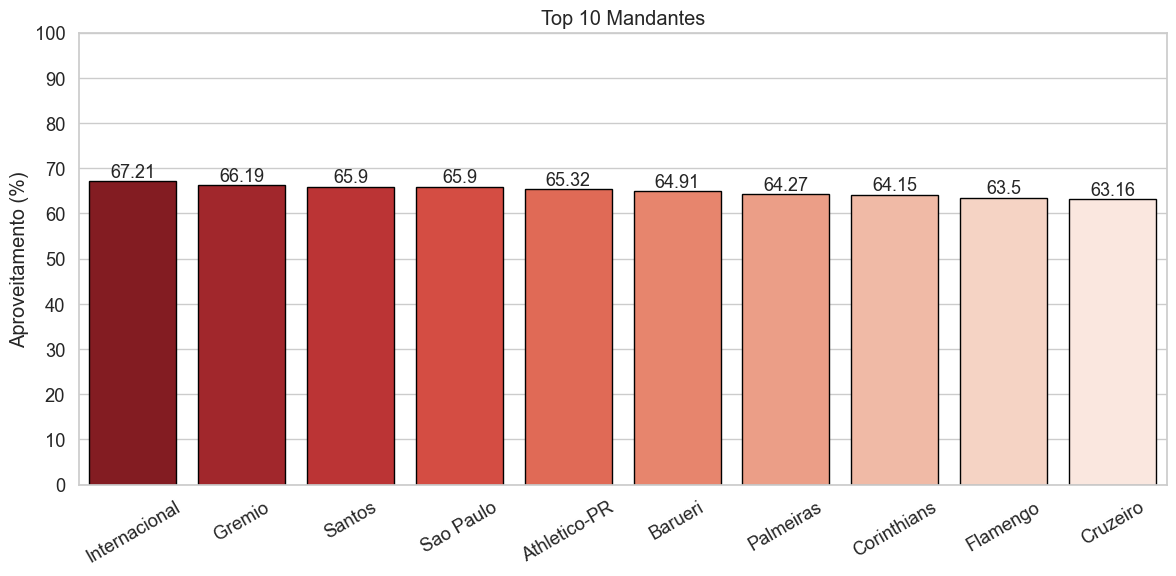

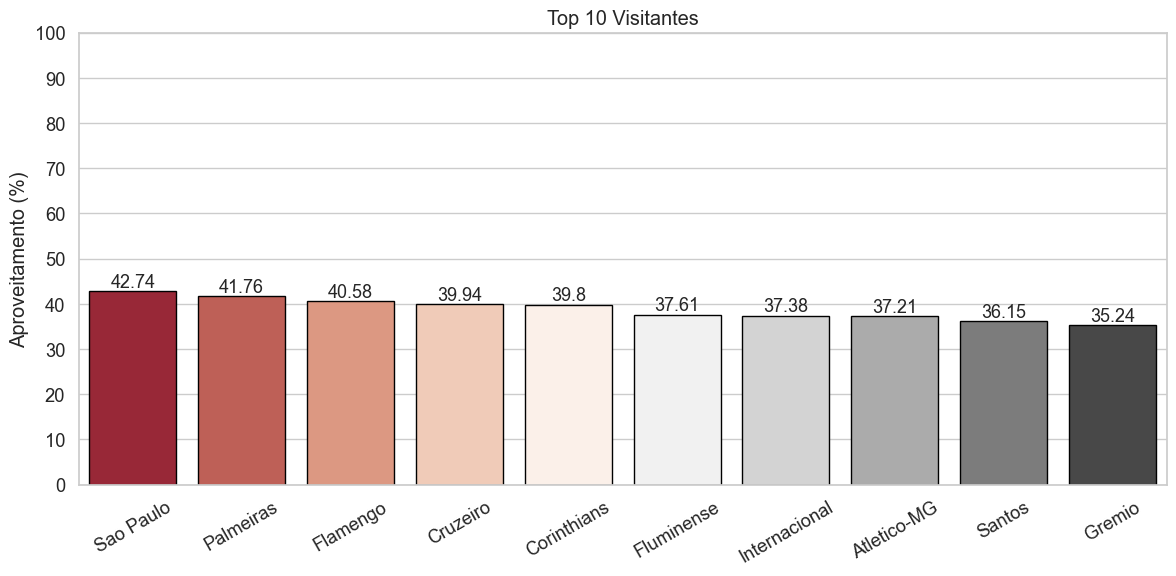

In [42]:
# Gráfico dos 10 melhores mandantes
plt.figure(figsize=(12, 6))
sns.barplot(x=mandantes.index, y=mandantes.values, palette="Reds_r", linewidth=1, edgecolor='black')
plt.ylabel('Aproveitamento (%)')
plt.title('Top 10 Mandantes')
plt.xticks(rotation=30)

# Definir os ticks do eixo y para serem exibidos em intervalos de 10 em 10
plt.yticks(range(0, 101, 10))

# Adicionando a legenda com o número de Y em cada barra
for index, value in enumerate(mandantes.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=13)

# Ajustando a figura
plt.tight_layout()
plt.show()

# Gráfico dos 10 melhores visitantes
plt.figure(figsize=(12, 6))
sns.barplot(x=visitantes.index, y=visitantes.values, palette="RdGy", linewidth=1, edgecolor='black')
plt.ylabel('Aproveitamento (%)')
plt.title('Top 10 Visitantes')
plt.xticks(rotation=30)

# Definir os ticks do eixo y para serem exibidos em intervalos de 10 em 10
plt.yticks(range(0, 101, 10))

# Adicionando a legenda com o número de Y em cada barra
for index, value in enumerate(visitantes.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=13)

# Ajustando a figura
plt.tight_layout()
plt.show()

### 4 - Quais foram os placares mais comuns desde 2003?

In [43]:
# Criação da nova coluna 'Placar'
df_full['Placar'] = [f"{m} x {v}" if m >= v else f"{v} x {m}" 
                     for m, v in zip(df_full['mandante_Placar'], df_full['visitante_Placar'])]

# Contagem dos placares
df_placares = df_full['Placar'].value_counts().reset_index()

# Renomeando as colunas
df_placares = df_placares.rename(columns={'Placar': 'Quantidade'})
df_placares = df_placares.rename(columns={'index': 'Placar'})

# Agrupando os placares menos frequentes a partir do décimo primeiro valor como 'Outros'
outros = {
    'Placar': 'Outros',
    'Quantidade': df_placares[df_placares.index >= 10]['Quantidade'].sum()
}
df_placares = df_placares[df_placares.index < 10].append(outros, ignore_index=True)

# Selecionando os 10 placares mais frequentes
top_placares = df_placares.nlargest(10, columns='Quantidade')

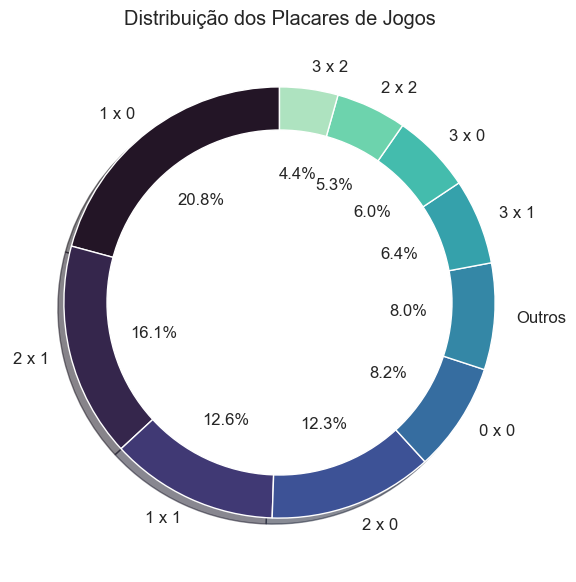

In [44]:
# Gerando uma paleta de 10 cores mais escuras que combinem com a cor base
paleta_cores = sns.color_palette("mako", n_colors=10)

# Plotagem do gráfico de pizza
plt.figure(figsize=(13, 7))  
plt.pie(top_placares['Quantidade'].values, labels=top_placares['Placar'].values, 
        startangle=90, shadow=True, autopct='%1.1f%%', colors=paleta_cores, textprops={'fontsize': 12})

# Adicionando o buraco na pizza
centre_circle = plt.Circle((0, 0), 0.80, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribuição dos Placares de Jogos') 

# Mostrando o gráfico
plt.show()

### 5 - Como é a distribuição de gols em cada minuto desde 2014?

In [45]:
# Função para transformar os minutos em categorias '45+' e '90+'
def categorizar_minutos(row):
    minuto = row['minuto']
    tempo = row['tempo']
    if minuto > 90:
        return '90+'
    elif minuto > 45 and tempo == 1:
        return '45+'
    else:
        return minuto

In [46]:
# Aplicando slicing para selecionar as colunas 'minuto' e 'tempo' do DataFrame br_gols
df_gols_por_minuto = df_gols[['minuto', 'tempo']]

# Aplicando a função categorizar_minutos aos minutos do DataFrame gols_por_minuto
df_gols_por_minuto['minuto_categorizado'] = df_gols_por_minuto.apply(categorizar_minutos, axis=1)

# Realizando a agregação dos gols por minuto categorizado
df_gols_por_minuto = df_gols_por_minuto['minuto_categorizado'].value_counts().reset_index()

# Renomeando as colunas para 'Minuto' e 'Gols'
df_gols_por_minuto = df_gols_por_minuto.rename(columns={'minuto_categorizado': 'Gols'})
df_gols_por_minuto = df_gols_por_minuto.rename(columns={'index': 'Minuto'})

In [47]:
# O restante do codigo foi feito para ordenar os minutos

# Selecionando as linhas em que o valor da coluna 'Minuto' é igual a '45+'
prorrogacao_45 = df_gols_por_minuto[df_gols_por_minuto['Minuto'] == '45+'].copy()

# Removendo as linhas do DataFrame 'gols_por_minuto' em que o valor da coluna 'Minuto' é igual a '45+'
df_gols_por_minuto.drop(df_gols_por_minuto[df_gols_por_minuto['Minuto'] == '45+'].index, inplace=True)

# Substitui o valor '90+' na coluna 'Minuto' por 91
df_gols_por_minuto['Minuto'].replace('90+', 91, inplace=True)

# Ordenando o DataFrame 'gols_por_minuto' com base na coluna 'Minuto'
df_gols_por_minuto = df_gols_por_minuto.sort_values(by='Minuto')

# Substituindo o valor 91 na coluna 'Minuto' por '90+'
df_gols_por_minuto['Minuto'].replace(91, '90+', inplace=True)

# Encontrando o índice da primeira ocorrência do valor 45 na coluna 'Minuto'
indice_inserir = df_gols_por_minuto[df_gols_por_minuto['Minuto'] == 45].index[0] + 1

# Adicionando a linha 'prorrogacao_45' ao 'gols_por_minuto'
df_gols_por_minuto = pd.concat([df_gols_por_minuto.loc[:indice_inserir-1], prorrogacao_45,
                             df_gols_por_minuto.loc[indice_inserir:]]).reset_index(drop=True)

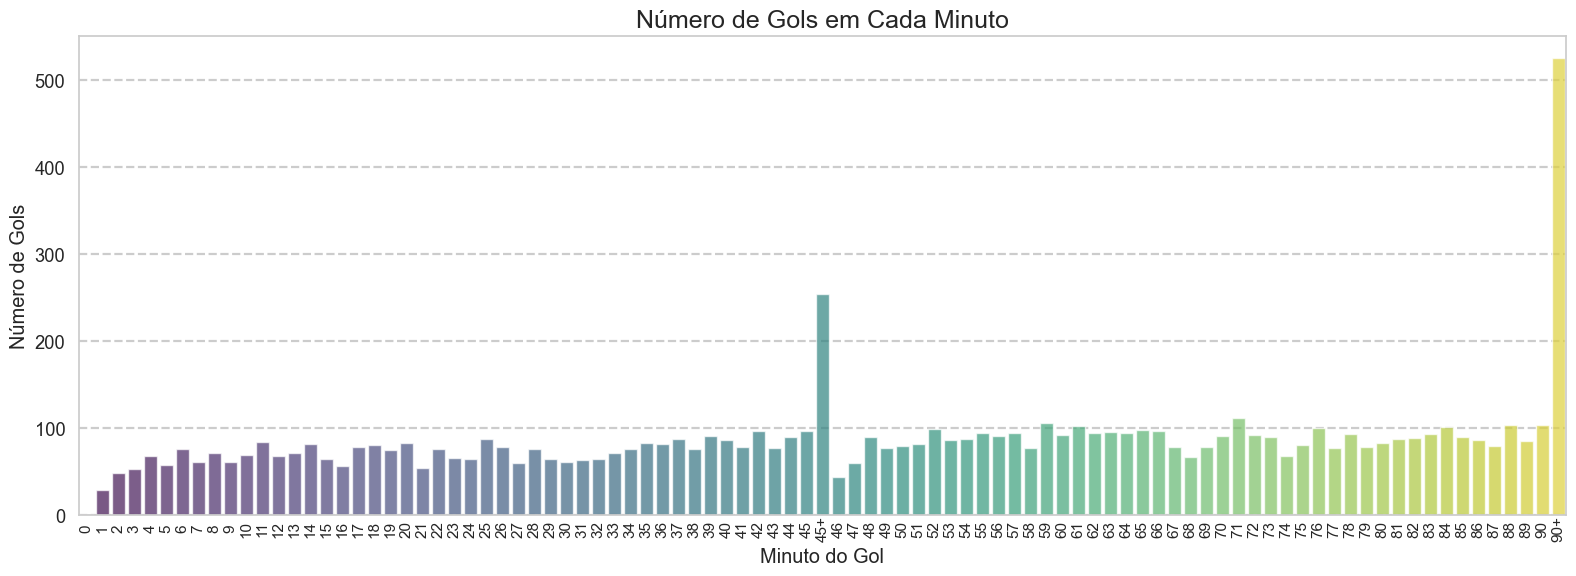

In [48]:
# Plotando o gráfico de barras
plt.figure(figsize=(16, 6))
sns.barplot(x=df_gols_por_minuto['Minuto'], y=df_gols_por_minuto['Gols'], alpha=0.7, palette='viridis')
plt.xlabel('Minuto do Gol')
plt.ylabel('Número de Gols')
plt.title('Número de Gols em Cada Minuto', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=1, linewidth=1.6)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90, ha='center', va='center', fontsize=11)

plt.tight_layout()  
plt.show()

### 6 - Quais foram os 10 maiores artilheiros desde 2014?

In [49]:
# Calculando os 10 maiores artilheiros desde 2014
top_artilheiros = df_gols['atleta'].value_counts()[:10]

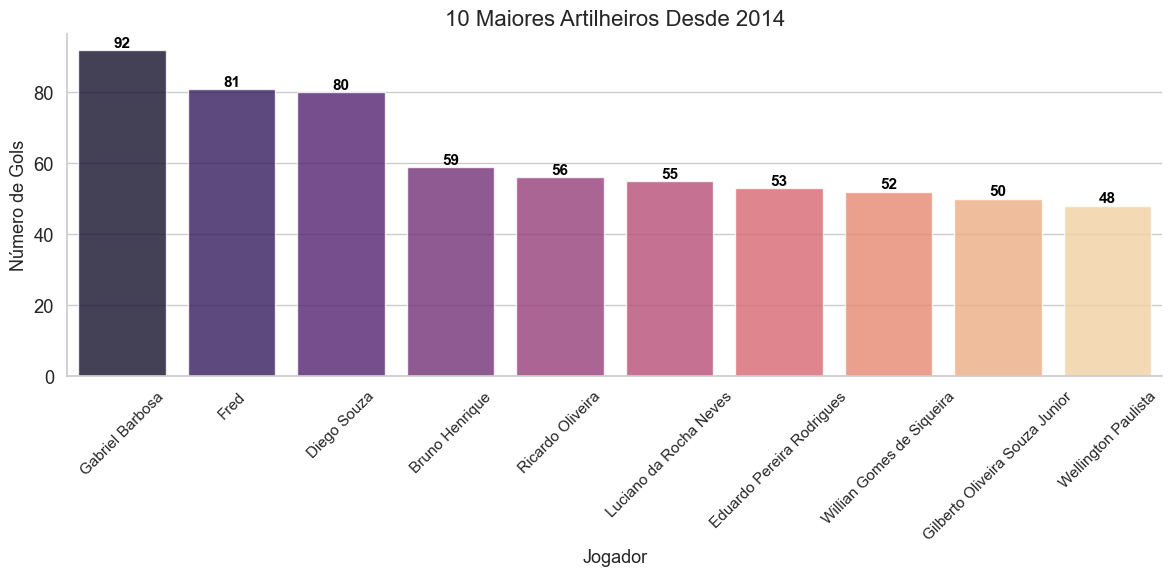

In [50]:
# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artilheiros.index, y=top_artilheiros.values, alpha=0.8, palette='magma') 
plt.xlabel('Jogador', fontsize=13) 
plt.ylabel('Número de Gols', fontsize=13) 
plt.title('10 Maiores Artilheiros Desde 2014', fontsize=16)
plt.xticks(rotation=45, ha='center', fontsize=11)
plt.gca().spines['right'].set_visible(False) # Removendo borda direita
plt.gca().spines['top'].set_visible(False) # Removendo borda superior

# Adicionando anotações com os valores de cada barra
for i, value in enumerate(top_artilheiros.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=11, weight='bold', color='black')

plt.tight_layout()
plt.show()

### 7 - Quais foram os 5 jogadores que mais receberam amarelo e os 5 jogadores que mais vermelho desde 2014?

In [51]:
# Filtrando os cartões amarelos
cartoes_amarelos = df_cartoes[df_cartoes['cartao'] == 'Amarelo']

# Filtrando os cartões vermelhos
cartoes_vermelhos = df_cartoes[df_cartoes['cartao'] == 'Vermelho']

# Agrupando por jogador e contando a quantidade de cartões amarelos e vermelhos recebidos por cada jogador
jogadores_amarelos = cartoes_amarelos.groupby('atleta')['cartao'].count().reset_index()
jogadores_vermelhos = cartoes_vermelhos.groupby('atleta')['cartao'].count().reset_index()

# Renomeando a coluna de contagem para "cartoes_amarelos" e "cartoes_vermelhos" para os respectivos DataFrames
jogadores_amarelos.rename(columns={'cartao': 'cartoes_amarelos'}, inplace=True)
jogadores_vermelhos.rename(columns={'cartao': 'cartoes_vermelhos'}, inplace=True)

# Ordenando em ordem decrescente e obtendo os 5 jogadores com mais cartões amarelos e vermelhos
top_5_amarelos = jogadores_amarelos.sort_values(by='cartoes_amarelos', ascending=False)[:5]
top_5_vermelhos = jogadores_vermelhos.sort_values(by='cartoes_vermelhos', ascending=False)[:5]

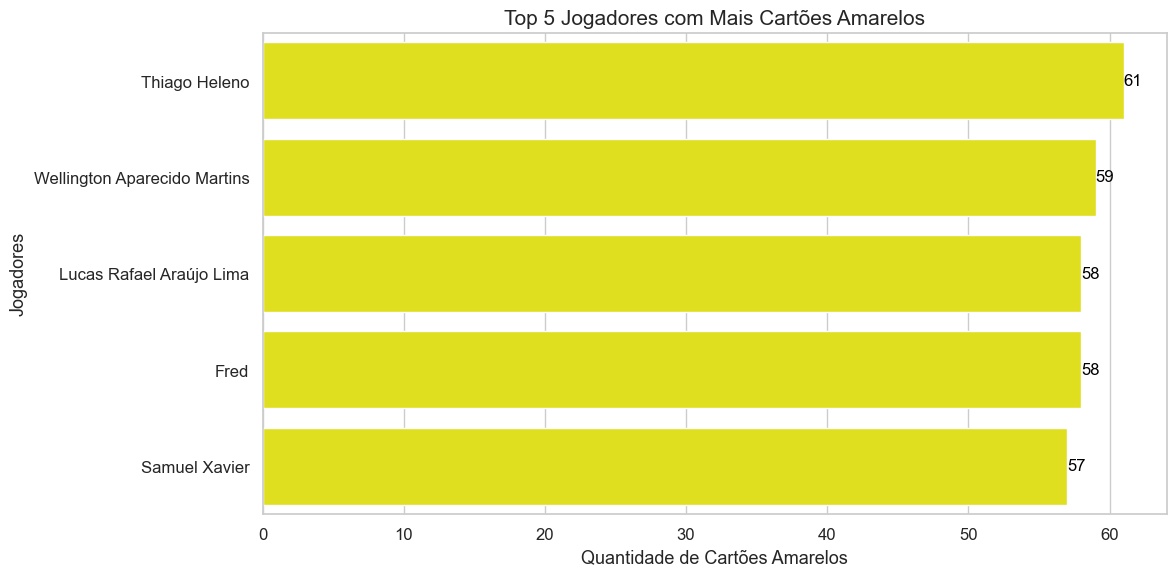

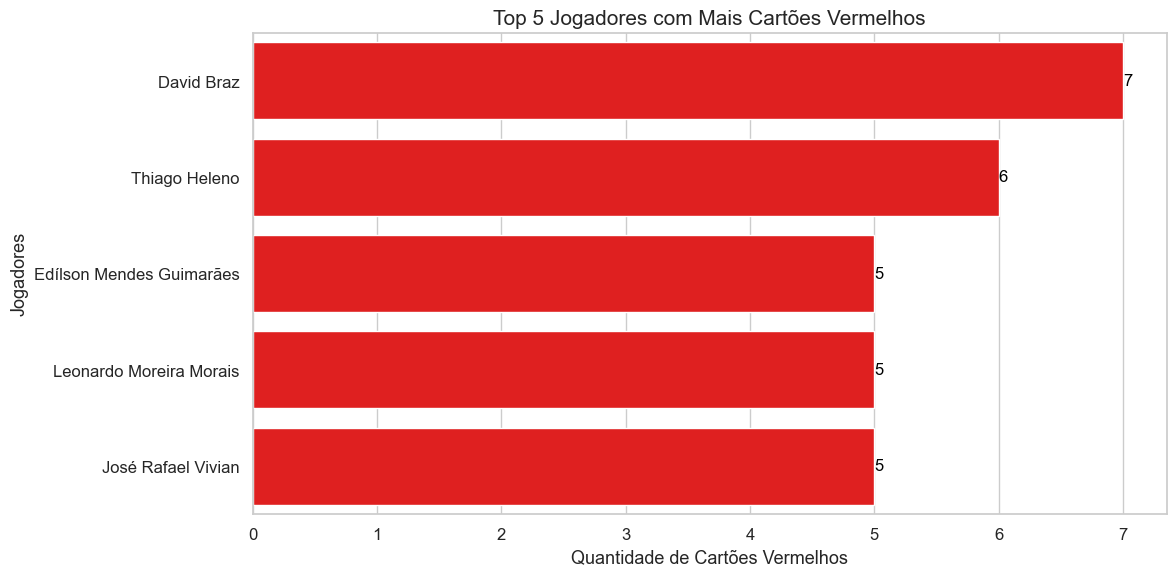

In [52]:
# Criando o gráfico de barras para os cartões amarelos
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_amarelos['cartoes_amarelos'], y=top_5_amarelos['atleta'], color='yellow')
plt.xlabel('Quantidade de Cartões Amarelos', fontsize=13)
plt.ylabel('Jogadores', fontsize=13)
plt.title('Top 5 Jogadores com Mais Cartões Amarelos', fontsize=15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

# Adicionando valores nas barras
for index, value in enumerate(top_5_amarelos['cartoes_amarelos']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Criando o gráfico de barras para os cartões vermelhos
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_vermelhos['cartoes_vermelhos'], y=top_5_vermelhos['atleta'], color='red')
plt.xlabel('Quantidade de Cartões Vermelhos', fontsize=13)
plt.ylabel('Jogadores', fontsize=13)
plt.title('Top 5 Jogadores com Mais Cartões Vermelhos', fontsize=15)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

# Adicionando valores nas barras
for index, value in enumerate(top_5_vermelhos['cartoes_vermelhos']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

### 8 - Qual é o aproveitamento de um time de acordo com o número de chutes e posse de bola?

In [53]:
# Combinando os datasets usando o ID da partida como chave de junção
df_combinados = pd.merge(df_full, df_est_full[['partida_id', 'chutes', 'posse_de_bola']], on='partida_id', how='inner')

# Dataframe combinado possui jogos duplicados por causa da coluna chutes
# Arrumando o dataframe
df_duplicatas = df_combinados[df_combinados.duplicated(subset='partida_id', keep='first')]
df_jogos_sem_duplicatas = df_combinados.drop_duplicates(subset='partida_id', keep='first')
df_jogos = pd.merge(df_jogos_sem_duplicatas, df_duplicatas[['partida_id', 'chutes', 'posse_de_bola']], on='partida_id', how='inner')

# Realizando slicing para obter apenas as informações necessárias
df_chutes = df_jogos[['partida_id', 'mandante', 'visitante', 'vencedor', 'chutes_x', 'chutes_y']]
df_posse_de_bola = df_jogos[['partida_id', 'mandante', 'visitante', 'vencedor', 'posse_de_bola_x', 'posse_de_bola_y']]

# Renomeando colunas
df_chutes = df_chutes.rename(columns={'chutes_x': 'chutes_mandante', 'chutes_y': 'chutes_visitante'})
df_posse_de_bola = df_posse_de_bola.rename(columns={'posse_de_bola_x': 'posse_de_bola_mandante', 
                                                    'posse_de_bola_y': 'posse_de_bola_visitante'})

In [54]:
# Função para criar as linhas de resultado e chutes para cada partida
def criar_df_chutes(row):
    if row['vencedor'] == 'Empate':
        linha_empate_1 = {'resultado': 'empate', 'chutes': row['chutes_mandante']}
        linha_empate_2 = {'resultado': 'empate', 'chutes': row['chutes_visitante']}
        return pd.DataFrame([linha_empate_1, linha_empate_2])
    elif row['vencedor'] == row['mandante']:
        linha_venceu = {'resultado': 'venceu', 'chutes': row['chutes_mandante']}
        linha_perdeu = {'resultado': 'perdeu', 'chutes': row['chutes_visitante']}
        return pd.DataFrame([linha_venceu, linha_perdeu])
    elif row['vencedor'] == row['visitante']:
        linha_venceu = {'resultado': 'venceu', 'chutes': row['chutes_visitante']}
        linha_perdeu = {'resultado': 'perdeu', 'chutes': row['chutes_mandante']}
        return pd.DataFrame([linha_venceu, linha_perdeu])

# Função para criar as linhas de resultado e posse de bola para cada partida
def criar_df_posse_de_bola(row):
    if row['vencedor'] == 'Empate':
        linha_empate_1 = {'resultado': 'empate', 'posse_de_bola': row['posse_de_bola_mandante']}
        linha_empate_2 = {'resultado': 'empate', 'posse_de_bola': row['posse_de_bola_visitante']}
        return pd.DataFrame([linha_empate_1, linha_empate_2])
    elif row['vencedor'] == row['mandante']:
        linha_venceu = {'resultado': 'venceu', 'posse_de_bola': row['posse_de_bola_mandante']}
        linha_perdeu = {'resultado': 'perdeu', 'posse_de_bola': row['posse_de_bola_visitante']}
        return pd.DataFrame([linha_venceu, linha_perdeu])
    elif row['vencedor'] == row['visitante']:
        linha_venceu = {'resultado': 'venceu', 'posse_de_bola': row['posse_de_bola_visitante']}
        linha_perdeu = {'resultado': 'perdeu', 'posse_de_bola': row['posse_de_bola_mandante']}
        return pd.DataFrame([linha_venceu, linha_perdeu])

# Aplicando a função para cada linha do dataframe original e concatenando os resultados
df_chutes = pd.concat(df_chutes.apply(criar_df_chutes, axis=1).to_list(), ignore_index=True)
df_posse_de_bola = pd.concat(df_posse_de_bola.apply(criar_df_posse_de_bola, axis=1).to_list(), ignore_index=True)

In [55]:
def calcular_aproveitamento(row):
    resultado_str = row['resultado']
    
    # Contagem das ocorrências de cada resultado na string
    venceu_count = resultado_str.count('venceu')
    empate_count = resultado_str.count('empate')
    perdeu_count = resultado_str.count('perdeu')
    
    # Cálculo do aproveitamento
    total_partidas = venceu_count + empate_count + perdeu_count
    aproveitamento = ((venceu_count * 3 + empate_count) / (total_partidas * 3)) * 100

    return round(aproveitamento, 2)

# Agrupando os dados pelo número de chutes 
df_chutes = df_chutes.groupby('chutes').sum().reset_index()

# Agrupando os dados pelo número de posse de bola
df_posse_de_bola = df_posse_de_bola.groupby('posse_de_bola').sum().reset_index()

# Aplicando a função 'calcular_aproveitamento' a cada linha do dataframe.
df_chutes['aproveitamento'] = df_chutes.apply(calcular_aproveitamento, axis=1)
df_posse_de_bola['aproveitamento'] = df_posse_de_bola.apply(calcular_aproveitamento, axis=1)


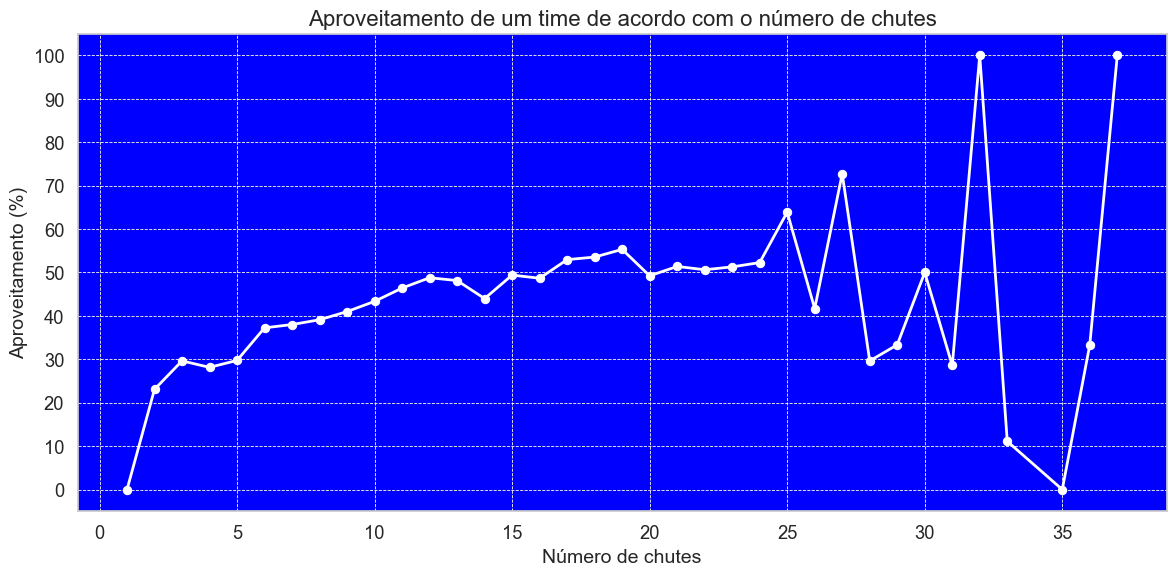

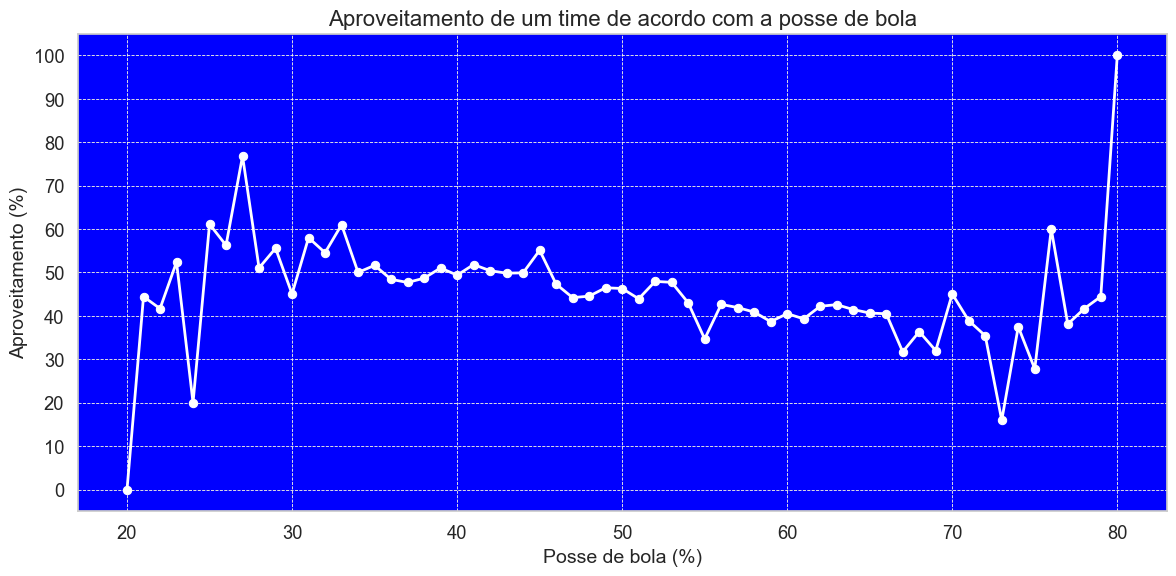

In [56]:
# Criando o gráfico de chutes
plt.figure(figsize=(12, 6))  
sns.lineplot(x=df_chutes['chutes'], y=df_chutes['aproveitamento'], marker='o', linewidth=2, color='white')

# Configurando cores e estilo do gráfico
plt.gca().set_facecolor('#0000FF')
plt.grid(color = '#FFFFE0', linestyle = '--', linewidth = 0.6)

# Configurando título e rótulos dos eixos
plt.title('Aproveitamento de um time de acordo com o número de chutes', fontsize=16)
plt.xlabel('Número de chutes', fontsize=14)
plt.ylabel('Aproveitamento (%)', fontsize=14)

# Definir os ticks do eixo y para serem exibidos em intervalos de 10 em 10
plt.yticks(range(0, 101, 10))

# Exibindo grades no gráfico
plt.grid(True)

plt.tight_layout()
plt.show()

# Criando o gráfico de posse de bola
plt.figure(figsize=(12, 6))  
sns.lineplot(x=df_posse_de_bola['posse_de_bola'], y=df_posse_de_bola['aproveitamento'], 
             marker='o', linewidth=2, color='white')

# Configurando cores e estilo do gráfico
plt.gca().set_facecolor('#0000FF')
plt.grid(color = '#FFFFE0', linestyle = '--', linewidth = 0.6)

# Configurando título e rótulos dos eixos
plt.title('Aproveitamento de um time de acordo com a posse de bola', fontsize=16)
plt.xlabel('Posse de bola (%)', fontsize=14)
plt.ylabel('Aproveitamento (%)', fontsize=14)

# Definir os ticks do eixo y para serem exibidos em intervalos de 10 em 10
plt.yticks(range(0, 101, 10))

# Exibindo grades no gráfico
plt.grid(True)

plt.tight_layout()
plt.show()